<a href="https://colab.research.google.com/github/leikcaro/predicicon-ventas/blob/main/Proy1Parte5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
filename = '/content/drive/MyDrive/Coding Dojo/Proyecto 1 /sales_predictions.csv'
df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [181]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Según lo anterior, podemos apreciar datos nulos en "Outlet_Size" e Item_Weight".

In [182]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [183]:
#ocuparemos el metodo fillna para rellenar datos faltantes de en item weight, ya que es un dato numérico y no queremos perder 
#valiosa información de las otras columnas, haremos una imputacion usando el valor proedio

values = {"Item_Weight": df["Item_Weight"].mean()}
df= df.fillna(value=values)
#como el elemento 7 es un NaN, chequeamos con los primeros 10 elementos para ver si la imputacion fue la correcta
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [184]:
#revisamos si efectivamente se imputaron los valores correctamente en todas las filas con datos faltantes en Item Weight
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


En el caso de Outlet Size, al ser la variable tipo string, podemos rellenar con el valor más frecuente, o sea la moda si no deseamos borrar el dato.
Creo que es importante no borrar el dato, ya que el tamaño de la tienda es menos relevante que toda la informacion del producto en si.







In [185]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [186]:
df["Outlet_Size"]= df["Outlet_Size"].fillna("Medium")#dado que "Medium es la moda, rellenaremos con ese valor"
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [188]:
#Ya podemos empezar a analizar la información y generar datos estadísticos de ella.

In [189]:
#partiremos viendo los tipos de alimentos
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [190]:
#lo que más hay son frutas y vegetales, seguido de snacks
#ahora veremos los tipos de alimentos y su visibilidad promedio
df.groupby(["Item_Type"])["Item_Visibility"].mean()

Item_Type
Baking Goods             0.069169
Breads                   0.066255
Breakfast                0.085723
Canned                   0.068129
Dairy                    0.072427
Frozen Foods             0.065645
Fruits and Vegetables    0.068513
Hard Drinks              0.064943
Health and Hygiene       0.055216
Household                0.061322
Meat                     0.062284
Others                   0.060241
Seafood                  0.074976
Snack Foods              0.066850
Soft Drinks              0.063972
Starchy Foods            0.067564
Name: Item_Visibility, dtype: float64

se observa que la visibilidad de los alimentos en mayor cantidad no es tan alta como la de masas y otros, pero se ve claramente que los snacks, 
el segundo tipo con mayor cantidad de productos, esta muy abajo en la visibilidad.

In [191]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

De lo anterior vemos que no hay altos en grasa, pero que tenemos un pequeño problema: LF debe corresponder a Low Fat al igual que low fat, lo mismo para reg y Regular. Esto es un error de tipeo por lo que vamos a arreglarlo para poder agrupar de mejor manera.

In [192]:
values2 = {"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"}
df.Item_Fat_Content= df.Item_Fat_Content.replace(to_replace=values2)
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Revisaremos todas las columnas tipo object para revisar problemas de tipeo similares

In [193]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [194]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [195]:
df.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [196]:
df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [197]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

No se observan errores de tipeo en otras columnas, por lo que seguimos con los datos estadísticos

In [198]:
#Algo no muy relevante pero para ir cerrando el analisis de los items es el peso promedio por tipo de aliemento, util para temas logísticos
df.groupby(["Item_Type"])["Item_Weight"].mean()

Item_Type
Baking Goods             12.377448
Breads                   11.629818
Breakfast                12.785278
Canned                   12.399254
Dairy                    13.329387
Frozen Foods             12.865543
Fruits and Vegetables    13.161297
Hard Drinks              11.611435
Health and Hygiene       13.093044
Household                13.297274
Meat                     12.825689
Others                   13.664761
Seafood                  12.614756
Snack Foods              12.964871
Soft Drinks              12.008636
Starchy Foods            13.589410
Name: Item_Weight, dtype: float64

Curiosamente casi todos los articulos pesan lo mismo en promedio! revisemos los minimos y maximos

In [199]:
df.groupby(["Item_Type"])["Item_Weight"].min()

Item_Type
Baking Goods             4.880
Breads                   4.635
Breakfast                6.425
Canned                   4.615
Dairy                    4.805
Frozen Foods             4.555
Fruits and Vegetables    5.460
Hard Drinks              4.610
Health and Hygiene       5.175
Household                5.030
Meat                     5.150
Others                   5.500
Seafood                  5.365
Snack Foods              5.095
Soft Drinks              4.590
Starchy Foods            6.695
Name: Item_Weight, dtype: float64

In [200]:
df.groupby(["Item_Type"])["Item_Weight"].max()

Item_Type
Baking Goods             20.85
Breads                   20.85
Breakfast                21.10
Canned                   21.35
Dairy                    20.70
Frozen Foods             20.85
Fruits and Vegetables    21.35
Hard Drinks              19.70
Health and Hygiene       21.25
Household                21.25
Meat                     21.25
Others                   20.50
Seafood                  20.75
Snack Foods              21.25
Soft Drinks              20.75
Starchy Foods            21.20
Name: Item_Weight, dtype: float64

Los pesos de los productos oscilan entre 4 y 21.5 aprox. 

In [201]:
#revisaremos los valores promedio por tipo de alimento

In [202]:
g2=df.groupby(["Item_Type"])["Item_MRP"].mean()
g2

Item_Type
Baking Goods             126.380766
Breads                   140.952669
Breakfast                141.788151
Canned                   139.763832
Dairy                    148.499208
Frozen Foods             138.503366
Fruits and Vegetables    144.581235
Hard Drinks              137.077928
Health and Hygiene       130.818921
Household                149.424753
Meat                     139.882032
Others                   132.851430
Seafood                  141.841719
Snack Foods              146.194934
Soft Drinks              131.492506
Starchy Foods            147.838023
Name: Item_MRP, dtype: float64

In [203]:
df.groupby(["Item_Type"])["Item_MRP"].min()

Item_Type
Baking Goods             33.9874
Breads                   31.9558
Breakfast                40.0480
Canned                   36.3506
Dairy                    33.4874
Frozen Foods             31.9558
Fruits and Vegetables    36.2506
Hard Drinks              34.2532
Health and Hygiene       33.1216
Household                32.4558
Meat                     34.7532
Others                   35.0190
Seafood                  33.7216
Snack Foods              32.3558
Soft Drinks              31.2900
Starchy Foods            34.0532
Name: Item_MRP, dtype: float64

In [204]:
df.groupby(["Item_Type"])["Item_MRP"].max()

Item_Type
Baking Goods             265.5568
Breads                   263.6594
Breakfast                234.9300
Canned                   266.8884
Dairy                    266.6884
Frozen Foods             264.8910
Fruits and Vegetables    264.2252
Hard Drinks              261.4278
Health and Hygiene       266.6884
Household                264.7910
Meat                     261.5936
Others                   254.9040
Seafood                  240.2880
Snack Foods              264.9568
Soft Drinks              263.5910
Starchy Foods            263.0252
Name: Item_MRP, dtype: float64

Es muy curioso que los valores y pesos sean tan similares para tipos de item tan diferentes!

In [205]:
#Ahora veremos como se distribuyen los items para venta en diferentes PDV, veremos que items son los mas vendidos:

In [206]:
  gr1=df.groupby(by=["Item_Type","Outlet_Type"])["Outlet_Type"].count()
  gr1

Item_Type      Outlet_Type      
Baking Goods   Grocery Store         85
               Supermarket Type1    426
               Supermarket Type2     68
               Supermarket Type3     69
Breads         Grocery Store         33
                                   ... 
Soft Drinks    Supermarket Type3     45
Starchy Foods  Grocery Store         13
               Supermarket Type1    104
               Supermarket Type2     17
               Supermarket Type3     14
Name: Outlet_Type, Length: 64, dtype: int64

Otra información relevante son las ventas por PDV para cada item, identificando los mejores PDV por categoria de item

In [207]:
  df.groupby(by=["Item_Type","Outlet_Identifier"])["Item_MRP"].sum()
  baking_grocery=df[(df['Item_Type']=="Baking Goods") & (df['Outlet_Type']== "Grocery Store")]['Outlet_Type'].count()
  baking_super1= df[(df['Item_Type']=="Baking Goods") & (df['Outlet_Type']== "Supermarket Type1")]['Outlet_Type'].count()
  baking_super2= df[(df['Item_Type']=="Baking Goods") & (df['Outlet_Type']== "Supermarket Type2")]['Outlet_Type'].count()
  baking_super3= df[(df['Item_Type']=="Baking Goods") & (df['Outlet_Type']== "Supermarket Type3")]['Outlet_Type'].count()
  baking_list=[baking_grocery, baking_super1, baking_super2, baking_super3]

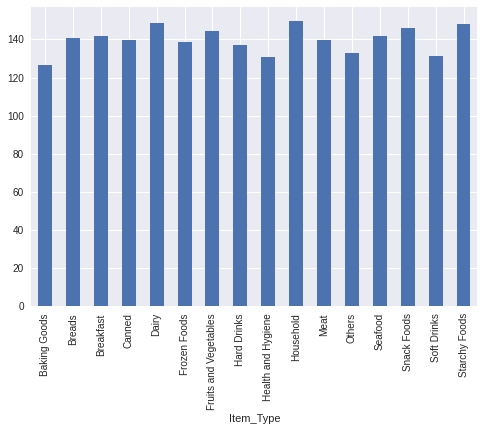

In [208]:
g2.plot.bar()

([<matplotlib.patches.Wedge at 0x7f05feb87b90>,
 [Text(1.007913586994831, 0.44057939256303574, 'Groc_Store'),
  Text(-1.065228946431528, 0.2743852978648394, 'SuperT1'),
  Text(0.5955203149055512, -0.9248543423343988, 'SuperT2'),
  Text(1.0390242700176564, -0.3611489530848406, 'SuperT3')])

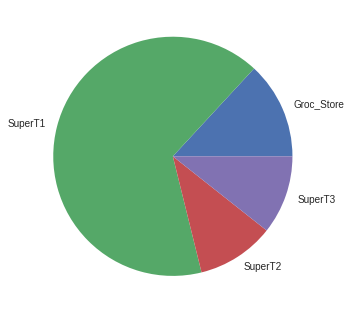

In [209]:
import matplotlib.pyplot as plt
baking_names= ['Groc_Store', 'SuperT1', 'SuperT2', 'SuperT3']
plt.pie(baking_list, labels=baking_names)
#en este grafico podemos ver, para la categoria de baking goods, como se distribuyen las ventas, siendo los super t1 quienes mas venden este tipo de producto


In [210]:
import seaborn as sns

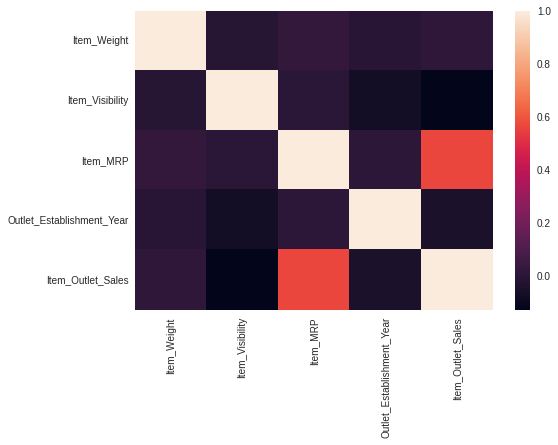

In [211]:
#Este grafico muestra todos los datos numericos y sus correlaciones, donde podemos ver que solo se destaca una correlacion moderada en el caso de Item_MRP y Item _Outlet_Sales
sns.heatmap(df.corr())

In [212]:
#Seria interesante ver un hitograma de variables relevantes, como Item_MRP y Item Outlet Sales

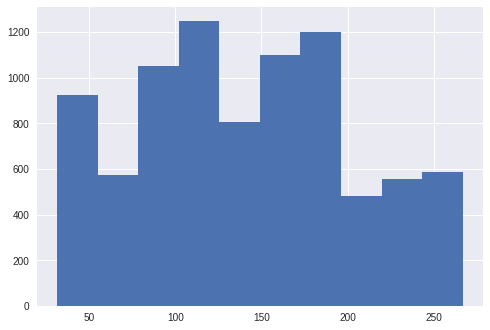

In [213]:
df["Item_MRP"].hist() #Los precios se distribuyen de manera homogenea, excepto que de 200 en adelante hay menos productos que en el resto de los precios

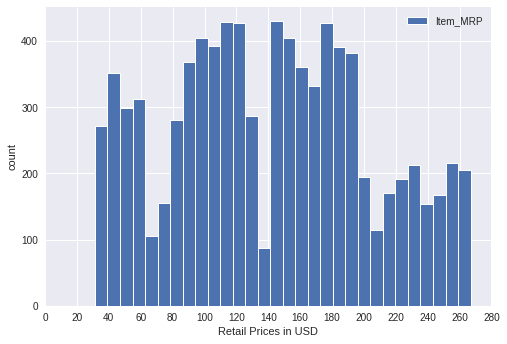

In [214]:
#dado que queremos tener mas control de como se presenta esta información para mejorar nuestro analisis, usaremos Matplotlib para poder detallar algunos puntos del gráfico
plt.style.use('seaborn')

Item_MRP=np.array(df["Item_MRP"])
plt.hist(Item_MRP, label='Item_MRP', stacked=True, edgecolor='white', lw=1, bins=30)
plt.xlabel('Retail Prices in USD')
plt.xticks(np.arange(0, 300, step=20))
plt.ylabel('count')
plt.legend()


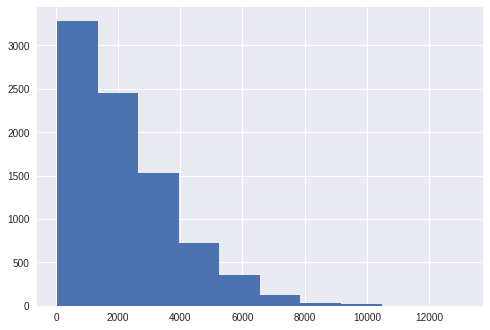

In [215]:
df["Item_Outlet_Sales"].hist() #Los precios se distribuyen de manera homogenea, excepto que de 200 en adelante hay menos productos que en el resto de los precios

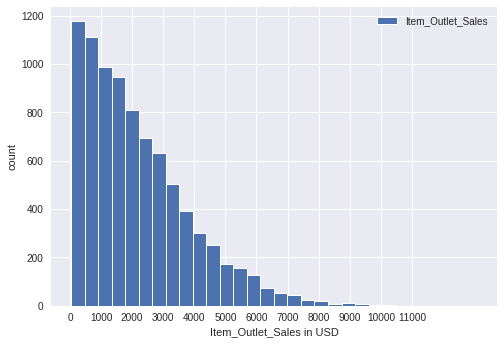

In [216]:
#Lo mismo en el caso de Item Outles Sales
Item_MRP=np.array(df["Item_Outlet_Sales"])
plt.hist(Item_MRP, label='Item_Outlet_Sales', stacked=True, edgecolor='white', lw=1, bins=30)
plt.xlabel('Item_Outlet_Sales in USD')
plt.xticks(np.arange(0, 12000, step=1000))
plt.ylabel('count')
plt.legend()

In [217]:
#de lo anterior podemos concluir que el grafico tiene un acento a la izquierda, y se distribuje de manera muy uniforme, donde la mayor cantidad de locales vende menos de 3500 

#ahora veremos algunos gráficos tipo box para poder entender mejor 

In [218]:
#Los minoristas piden que diseñemos un modelo que ayude a predecir ventas en los PDV, y para ello desarrollaremos en primera instancia, dos modelos sencillos,
#evaluando si tienen buenos resultados predictivos: linear regression y KNN
#Previo a dicho analisis revisaremos los tipos de datos, ya que para hacer regresion lineal necesitamos datos numericos o categóricos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [219]:
#Analisis de los features
#0. item ideintifier, no nos agrega valor esta columna al analisis por lo que lo eliminaremos para realizar linear regression:
df=df.drop("Item_Identifier", axis=1)
#las columnas 2, 4, 6, 8, 9 y 10 pueden ser transformada en categorias, por lo que la dejaremos para hacer one hot encoding

In [220]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [221]:
# al solo haber dos tipos, dejaremos low fat como 0 y regular como 1, ya que además low fat y regular fat son ordinales
gen_ord_map = {'Low Fat': 0, 'Regular': 1}
df['Item_Fat_Content_n'] = df['Item_Fat_Content'].map(gen_ord_map)
df=df.drop(["Item_Fat_Content"], axis=1)
df['Item_Fat_Content_n'][0:4]

0    0
1    1
2    0
3    1
Name: Item_Fat_Content_n, dtype: int64

In [222]:
#revisaremos item_type
df['Item_Type'].value_counts() #tenemos diferentes clasificaciones no ordinales por lo que quedan asi para que el one hot encoding las transforme

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [223]:
df['Outlet_Identifier'].value_counts() #lo mismo pasa en este caso

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [224]:
df['Outlet_Size'].value_counts() #en esta columna si es posible cambiar los datos por val nominales
values3 = {"Small": 0, "Medium": 1, "High": 2}
df['Outlet_Size']=df['Outlet_Size'].replace(values3)
df['Outlet_Size'].value_counts()

1    5203
0    2388
2     932
Name: Outlet_Size, dtype: int64

In [225]:
df['Outlet_Location_Type'].value_counts() #en esta columna si es posible cambiar los datos por val nominales
values4 = {"Tier 1": 1, "Tier 2": 2, "Tier 3": 3}
df['Outlet_Location_Type']=df['Outlet_Location_Type'].replace(values4)
df['Outlet_Location_Type'].value_counts()

3    3350
2    2785
1    2388
Name: Outlet_Location_Type, dtype: int64

In [226]:
df['Outlet_Type'].value_counts() #Se aprecia un orden en donde grocery es le mas bajo y despues 3 tipos de supermercado, por lo que haremos lo mismo usanod grocery como 0
values5 = {"Grocery Store": 0,"Supermarket Type1": 1, "Supermarket Type2": 2, "Supermarket Type3": 3}
df['Outlet_Location_Type']=df['Outlet_Location_Type'].replace(values5)
df['Outlet_Location_Type'].value_counts()

3    3350
2    2785
1    2388
Name: Outlet_Location_Type, dtype: int64

In [227]:
pip install --upgrade category_encoders


In [228]:
from sklearn.model_selection import train_test_split
import category_encoders as ce #esta biblioteca tiene mejores encoders que scikitlearn 
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True) 
df_ohe= ohe.fit_transform(df)
df_ohe.head()


,Item_Weight,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Baking Goods,Item_Type_Snack Foods,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT019,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales,Item_Fat_Content_n
0,9.30,0.016047,1,0,0,0,0,0,0,0,...,0,1999,1,1,1,0,0,0,3735.1380,0
1,5.92,0.019278,0,1,0,0,0,0,0,0,...,0,2009,1,3,0,1,0,0,443.4228,1
2,17.50,0.016760,0,0,1,0,0,0,0,0,...,0,1999,1,1,1,0,0,0,2097.2700,0
3,19.20,0.000000,0,0,0,1,0,0,0,0,...,0,1998,1,3,0,0,1,0,732.3800,1
4,8.93,0.000000,0,0,0,0,1,0,0,0,...,0,1987,2,3,1,0,0,0,994.7052,0


In [229]:
#Examinaremos las características de los features que nos brindan información cuantitativa sobre cada punto de datos. 
#La columna "Item_Outlet_Sales", será la variable que buscamos predecir.
 
# matriz de características (debe ser una matriz NumPy)
# valores convierte el marco de datos en Num
X_ohe=df_ohe.drop("Item_Outlet_Sales", axis=1)
X_ohe.shape

(8523, 37)

In [230]:
y=df_ohe["Item_Outlet_Sales"].values
y.shape

(8523,)

In [231]:
X_ohe_train, X_ohe_test, y_ohe_train, y_ohe_test = train_test_split(X_ohe, y, test_size=0.3, random_state=42)

In [232]:
# Hacer una instancia de regresión lineal
reg = LinearRegression(fit_intercept=True)

In [233]:
reg.fit(X_ohe_train,y_ohe_train)

LinearRegression()

In [234]:
reg.predict(X_ohe_train[0:10])


array([  17.66662561, 1657.02995605, 3547.33822047, 3411.06647952,
       3033.78515311, 2677.69573299, 1598.62641643, 3384.19059714,
       1694.04774558, 3472.45671867])

In [235]:
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [236]:
reg.predict(X_ohe_test[0:10])

array([1331.29570452,  711.29943065,  899.36466498, 4240.93386203,
       3339.89389409,  620.950039  , 4739.68674786, 2083.31193765,
       1392.00542987, 2829.07918442])

In [237]:
score = reg.score(X_ohe_test, y_ohe_test)


In [238]:
score

0.5678856047927663

In [239]:
#nuestra regresion lineal funciona mas o menos mal, de todos modos, revisaremos cuales son los features mas relevantes:
reg.coef_

array([   -1.59137657,  -514.7308738 ,  -124.33579775,   -53.34499238,
         -39.5573327 ,    23.17788808,    -5.27250357,   -22.11783909,
         -32.74051631,   -48.69870346,     7.21316942,    13.32956984,
          -1.60024579,     5.36278989,   -37.23786323,     7.33858845,
         -25.41541282,   333.89920142,    15.81259014,   203.23757143,
           1.87844781,  -636.49218378,  -178.49914012,   761.66014845,
         -69.95173976,   125.54924827,    91.9549504 ,   160.90703861,
        -460.2443413 ,    -7.39089772,    28.88321218,   113.59909184,
         333.19792882,     1.87844781, -1096.73652508,   761.66014845,
          76.23958294])

In [240]:
#se aprecia que los coeficientes 23 y 35 son los mas altamente influyentes, mientras que 24 y 18 los que influyen negativamente. 
reg.coef_

array([   -1.59137657,  -514.7308738 ,  -124.33579775,   -53.34499238,
         -39.5573327 ,    23.17788808,    -5.27250357,   -22.11783909,
         -32.74051631,   -48.69870346,     7.21316942,    13.32956984,
          -1.60024579,     5.36278989,   -37.23786323,     7.33858845,
         -25.41541282,   333.89920142,    15.81259014,   203.23757143,
           1.87844781,  -636.49218378,  -178.49914012,   761.66014845,
         -69.95173976,   125.54924827,    91.9549504 ,   160.90703861,
        -460.2443413 ,    -7.39089772,    28.88321218,   113.59909184,
         333.19792882,     1.87844781, -1096.73652508,   761.66014845,
          76.23958294])

In [241]:
reg.coef_[0]

-1.5913765741655752

In [242]:
#df_ohe contiene las 37 columnas feaures y la target, por lo que podemos crear un diccionario para asociar cada una de las columnas con las respuestas
df_cols={}
for i in range(36):
  
  #print(df_ohe.columns[i])
  df_cols[df_ohe.columns[i]]= reg.coef_[i]
print(df_cols)

{'Item_Weight': -1.5913765741655752, 'Item_Visibility': -514.7308738035172, 'Item_Type_Dairy': -124.33579774709176, 'Item_Type_Soft Drinks': -53.34499238125909, 'Item_Type_Meat': -39.55733269858203, 'Item_Type_Fruits and Vegetables': 23.177888084063344, 'Item_Type_Household': -5.272503565823158, 'Item_Type_Baking Goods': -22.11783908840722, 'Item_Type_Snack Foods': -32.74051630822479, 'Item_Type_Frozen Foods': -48.69870346362569, 'Item_Type_Breakfast': 7.213169415726314, 'Item_Type_Health and Hygiene': 13.329569839385366, 'Item_Type_Hard Drinks': -1.6002457931696739, 'Item_Type_Canned': 5.362789888736302, 'Item_Type_Breads': -37.237863234311405, 'Item_Type_Starchy Foods': 7.338588449935988, 'Item_Type_Others': -25.415412815304993, 'Item_Type_Seafood': 333.8992014179671, 'Item_MRP': 15.812590144191832, 'Outlet_Identifier_OUT049': 203.23757142633377, 'Outlet_Identifier_OUT018': 1.8784478086439345, 'Outlet_Identifier_OUT010': -636.4921837770039, 'Outlet_Identifier_OUT013': -178.4991401200

In [243]:
#probemos ahora con KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [244]:
X_ohe.shape

(8523, 37)

In [245]:
y.shape

(8523,)

In [246]:
scaler = StandardScaler()
# Ajusta en X_ohe (asumiendo que tu matriz de características es una matriz NumPy)
scaler.fit(X_ohe)
# Transform X
X_ohe = scaler.transform(X_ohe);
scaler3= StandardScaler()
scaler3.fit(y.reshape(-1, 1))
y= scaler3.transform(y.reshape(-1, 1));
y

array([[ 0.910601  ],
       [-1.01844035],
       [-0.04923754],
       ...,
       [-0.57909963],
       [-0.19672492],
       [-0.82959407]])

In [247]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

In [248]:
X_ohe[0]


array([-0.84187169, -0.97073217,  3.39073258, -0.2347081 , -0.22908971,
       -0.41106623, -0.34573455, -0.28685487, -0.40480522, -0.33413668,
       -0.11434598, -0.25490319, -0.16048428, -0.28709435, -0.17419336,
       -0.13293473, -0.14223161, -0.08698222,  1.74745381,  2.85736174,
       -0.34955064, -0.26391971, -0.35039545, -0.35102831, -0.34976195,
       -0.3491278 , -0.34997319, -0.34997319, -0.25698497,  0.13954076,
        0.28458121, -1.36933384,  0.72680189, -0.34955064, -0.38152918,
       -0.35102831, -0.73814723])

In [249]:
rmse_val=[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_ohe_train, y_ohe_train)  #fit the model
    pred=model.predict(X_ohe_test) #make prediction on test set
    error = mean_squared_error(y_ohe_test,pred)**(1/2) #calculate rmse
    rmse_val.append(error) #store rmse values
    
    print('Score for k= ' , K , 'is:', model.score(X_ohe_test, y_ohe_test))
    print('RMSE value for k= ' , K , 'is:', error)

Score for k=  1 is: 0.14864653684204265
RMSE value for k=  1 is: 1544.2265182939254
Score for k=  2 is: 0.3767823344048
RMSE value for k=  2 is: 1321.2224065120367
Score for k=  3 is: 0.4446218768376624
RMSE value for k=  3 is: 1247.2411668221382
Score for k=  4 is: 0.4768309054043084
RMSE value for k=  4 is: 1210.534281909469
Score for k=  5 is: 0.49016272045959053
RMSE value for k=  5 is: 1195.0108451391764
Score for k=  6 is: 0.4969065154531801
RMSE value for k=  6 is: 1187.0811235435226
Score for k=  7 is: 0.5052702731564305
RMSE value for k=  7 is: 1177.172358952642
Score for k=  8 is: 0.5076459695988107
RMSE value for k=  8 is: 1174.3425617442492
Score for k=  9 is: 0.5082331836727704
RMSE value for k=  9 is: 1173.6420533977594
Score for k=  10 is: 0.5046190241884747
RMSE value for k=  10 is: 1177.9469032286954
Score for k=  11 is: 0.5028419290066375
RMSE value for k=  11 is: 1180.0578540596662
Score for k=  12 is: 0.4958136724357719
RMSE value for k=  12 is: 1188.3697404812756
S

In [250]:
#como podemos apreciar en lo anterior, tenemos otro modelo que predice aprox con un 50% de exactitud los valores y en este caso el RMSE para el mejor valor de k es de 1174.3425617442492

#¿Cómo podemos mejorar los resultados de nuestros modelos?
#una de las maneras fue iterando los resultados y cambiando los valores de k, otra manera es eliminar columnas que no son relevantes... 
#elegir cuales son estas columnas no es facil, pero podemos ver cuales no son relevantes viendo los pesos que el modelo les da a las variables



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_Type_Dairy                  8523 non-null   int64  
 3   Item_Type_Soft Drinks            8523 non-null   int64  
 4   Item_Type_Meat                   8523 non-null   int64  
 5   Item_Type_Fruits and Vegetables  8523 non-null   int64  
 6   Item_Type_Household              8523 non-null   int64  
 7   Item_Type_Baking Goods           8523 non-null   int64  
 8   Item_Type_Snack Foods            8523 non-null   int64  
 9   Item_Type_Frozen Foods           8523 non-null   int64  
 10  Item_Type_Breakfast              8523 non-null   int64  
 11  Item_Type_Health and Hygiene     8523 non-null   int64  
 12  Item_Type_Hard Drink

In [251]:
#anteriormente habiamos generado una lista con los features que afectaban poco los resultados de nuestro modelo de regresion lineal, por lo que 
#ocuparemos dichos valores para elegir qué features usaremos para filtrar nuestro modelo, para ello creo que una buena solucion es descartar los features
#cuyo valor absoluto es un outlayer, para ello primero graficaremos usando hitograma, los valores del diccionario de resultados de la regresion lineal

In [252]:
good_cols={}
for key, value in df_cols.items():
  if value > abs(35):
    print("el valor a guardar sera: ", value)
    good_cols[key]=value
good_cols

el valor a guardar sera:  333.8992014179671
el valor a guardar sera:  203.23757142633377
el valor a guardar sera:  761.66014845351
el valor a guardar sera:  125.54924826830784
el valor a guardar sera:  91.95495039731198
el valor a guardar sera:  160.90703860802404
el valor a guardar sera:  113.59909184347991
el valor a guardar sera:  333.1979288167982
el valor a guardar sera:  761.6601484535117


{'Item_Type_Seafood': 333.8992014179671,
 'Outlet_Identifier_OUT017': 125.54924826830784,
 'Outlet_Identifier_OUT027': 761.66014845351,
 'Outlet_Identifier_OUT035': 160.90703860802404,
 'Outlet_Identifier_OUT046': 91.95495039731198,
 'Outlet_Identifier_OUT049': 203.23757142633377,
 'Outlet_Location_Type': 113.59909184347991,
 'Outlet_Type_Supermarket Type1': 333.1979288167982,
 'Outlet_Type_Supermarket Type3': 761.6601484535117}

In [253]:
gc=[*good_cols] #acceder a los indices del dict y transformarlos a lista
gc

['Item_Type_Seafood',
 'Outlet_Identifier_OUT049',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT035',
 'Outlet_Location_Type',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type3']

In [254]:
new_df=df_ohe.loc[:,gc]
new_df_arr=new_df.values
scaler2 = StandardScaler()
# Ajusta en X_ohe (asumiendo que tu matriz de características es una matriz NumPy)


In [255]:
scaler2.fit(new_df_arr)
# Transform X
new_df_arr = scaler2.transform(new_df_arr);
new_df_arr

array([[-0.08698222,  2.85736174, -0.35102831, ..., -1.36933384,
         0.72680189, -0.35102831],
       [-0.08698222, -0.34997319, -0.35102831, ...,  1.09156913,
        -1.37589075, -0.35102831],
       [-0.08698222,  2.85736174, -0.35102831, ..., -1.36933384,
         0.72680189, -0.35102831],
       ...,
       [-0.08698222, -0.34997319, -0.35102831, ..., -0.13888236,
         0.72680189, -0.35102831],
       [-0.08698222, -0.34997319, -0.35102831, ...,  1.09156913,
        -1.37589075, -0.35102831],
       [-0.08698222, -0.34997319, -0.35102831, ..., -1.36933384,
         0.72680189, -0.35102831]])

In [256]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_df_arr, y, test_size=0.3, random_state=42)


In [257]:
#usaremos la lista de variables que para la regresion eran relevantes para generar un modelo en KNN y evaluar si mejora:

rmse_val=[]
for K in range(20):
    K = K+1 #solo para q no parta con neighbors=0
    model2 = neighbors.KNeighborsRegressor(n_neighbors = K)

    model2.fit(X_new_train, y_new_train)  #fit the model
    pred=model2.predict(X_new_test) #make prediction on test set
    error = mean_squared_error(y_new_test,pred)**(1/2) #calculate rmse
    rmse_val.append(error) #store rmse values
    
    print('Score for k= ' , K , 'is:', model2.score(X_new_test, y_new_test))
    print('RMSE value for k= ' , K , 'is:', error)

Score for k=  1 is: -0.6879204124286833
RMSE value for k=  1 is: 1.2742402514412796
Score for k=  2 is: -0.6499956474129784
RMSE value for k=  2 is: 1.2598438966685408
Score for k=  3 is: -0.29539535498148095
RMSE value for k=  3 is: 1.1162886391584421
Score for k=  4 is: -0.013379871410372113
RMSE value for k=  4 is: 0.9873280464773883
Score for k=  5 is: -0.004512303858585698
RMSE value for k=  5 is: 0.9829987541171686
Score for k=  6 is: 0.07572132586656732
RMSE value for k=  6 is: 0.9429242465729227
Score for k=  7 is: 0.1387324428091331
RMSE value for k=  7 is: 0.9102158235904817
Score for k=  8 is: 0.09218861953088975
RMSE value for k=  8 is: 0.9344867512133384
Score for k=  9 is: 0.12125118152723313
RMSE value for k=  9 is: 0.9194068055805135
Score for k=  10 is: 0.10784048710787741
RMSE value for k=  10 is: 0.9263958319424138
Score for k=  11 is: 0.1371733272245903
RMSE value for k=  11 is: 0.9110393133390671
Score for k=  12 is: 0.12663501829582935
RMSE value for k=  12 is: 0.

In [258]:
#el resultado anterior es muy malo, por lo que eliminando features sugeridos por la regresion lineal para aplicarlo al KNN en este caso no dio resultado
#en el caso de una nueva regresion lineal:



In [259]:
# Hacer una instancia de regresión lineal
reg2 = LinearRegression(fit_intercept=True)

In [261]:
reg2.fit(X_new_train, y_new_train)
reg2_pred = model2.predict(X_new_test)
reg2_pred

array([[-0.15911174],
       [-0.13306734],
       [-0.01972055],
       ...,
       [-0.69014436],
       [-0.10969566],
       [ 0.30022562]])

In [267]:
 error2 = mean_squared_error(y_new_test,reg2_pred)**(1/2)
 print("el error es: ",error2)
 print("el score es: ", reg2.score(X_new_test, y_new_test))

el error es:  0.8841280307951516
el score es:  0.22485534389296824


In [269]:
#por lo anterior, al parecer no nos está resultando eliminar features para mejorar los resultados!